# Project: TMDb Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#Q1"> - Which is the most popular genre per year, over the last 45 years?</a></li>
<li><a href="#Q2"> - What are the top 5 most profitable genres?</a></li>
<li><a href="#Q3"> - What kinds of properties are associated with movies that have high revenues?</a></li>
<li><a href="#Q4"> - Which movie was the most profitable?</a></li>
<li><a href="#Q5"> - Which movie was the least profitable?</a></li> 
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitations">Limitations</a></li>

## Introduction
This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
 - Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
 - There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.
 - The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In this section of the report, we will load in the data, check for cleanliness, and then trim and clean the datasets for analysis.

### General Properties

### <font color=green>Let's explore the TMDb dataset:</font>

In [2]:
# Read the TMDb csv file:
df = pd.read_csv('tmdb_movies.csv')

In [3]:
# We are calling the head function to get the first 5 lines of the data
# and get an idea of what columns there are and what data will be useful
# for our analysis:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
# We are calling the shape method in order to return a tuple representing the dimensionality of the dataset:
df.shape

(10866, 21)

In [5]:
# We are calling the describe method. We are using this function to generate descriptive statistics that summarize
#the central tendency, dispersion and shape of a dataset’s distribution:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
#We are calling the info method so we can get a concise summary of the dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [7]:
# Print the column numbers and names:
for numbers, names in enumerate(df.columns):
    print(numbers, names)

0 id
1 imdb_id
2 popularity
3 budget
4 revenue
5 original_title
6 cast
7 homepage
8 director
9 tagline
10 keywords
11 overview
12 runtime
13 genres
14 production_companies
15 release_date
16 vote_count
17 vote_average
18 release_year
19 budget_adj
20 revenue_adj


In [8]:
#Print the data types of each column:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

### Data Cleaning

In [9]:
# We identified the columns that need to be deleted, as they won't give
# us any insights and we delete the columns from the dataset.
# First we want to copy the existing dataset into a new one which will have
# only the columns we need to keep:
df_new = df
df_new.drop(['id', 'imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 'vote_count'], axis = 1, inplace = True)
# We check how the dataset looks after these changes:
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,7.3,2015,1.747999e+08,1.385749e+09


In [10]:
# We are checking whether there are duplicated rows:
sum(df.duplicated())

1

In [11]:
# We are deleting this one duplicate row:
df.drop_duplicates(inplace=True)
# Double check that there are no longer any duplicates:
sum(df.duplicated())

0

In [12]:
# We now need to change the datatype of the Release Date column
# from a string into a datatime:
df_new['release_date'] = pd.to_datetime(df_new['release_date'])
# Check whether this changed:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 14 columns):
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
director                10821 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null datetime64[ns]
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              10865 non-null float64
revenue_adj             10865 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(4), object(5)
memory usage: 1.2+ MB


In [13]:
# We are checking which columns have NaN values and how many:
df_new.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [14]:
# We notice that there are many rows with NaN values, therefore instead of
# dropping them, as this might affect the results, we will be replacing
# these values with 'N/A':
df_new.fillna('N/A',inplace=True)
# We are checking if there are NaN values after this change:
df_new.isnull().sum()

popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [15]:
# From the column Cast, we will be extracting the first name from each row
# and we will be saving it in a new one which we will be calling "Leading Actor"
df_new['leading_actor'] = df_new.cast.apply(lambda x: x.split('|')[0])
# We check whether the new column was added in:
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_average,release_year,budget_adj,revenue_adj,leading_actor
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,6.5,2015,1.379999e+08,1.392446e+09,Chris Pratt
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,7.1,2015,1.379999e+08,3.481613e+08,Tom Hardy
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,6.3,2015,1.012000e+08,2.716190e+08,Shailene Woodley
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,7.5,2015,1.839999e+08,1.902723e+09,Harrison Ford
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,7.3,2015,1.747999e+08,1.385749e+09,Vin Diesel


In [16]:
# As there are some rows in the Genres column that use more than one
# genre to describe a movie, from the column Genres, we will be extracting the first name from each row
# and we will be saving it in a new one which we will be calling "main_genres"
df_new['main_genres'] = df_new.genres.apply(lambda x: x.split('|')[0])
# We check whether the new column was added in:
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_average,release_year,budget_adj,revenue_adj,leading_actor,main_genres
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,6.5,2015,1.379999e+08,1.392446e+09,Chris Pratt,Action
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,7.1,2015,1.379999e+08,3.481613e+08,Tom Hardy,Action
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,6.3,2015,1.012000e+08,2.716190e+08,Shailene Woodley,Adventure
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,7.5,2015,1.839999e+08,1.902723e+09,Harrison Ford,Action
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,7.3,2015,1.747999e+08,1.385749e+09,Vin Diesel,Action


In [17]:
# We have the columns Revenue and Budget provided. From these 2 columns
# we can easily calculate how much money a movie made. This will be 
# calculated by subtracting the budget amount from the revenue amount.
# We will be saving the result in a separate column (profit):
df_new['profit'] = df_new['revenue'] - df_new['budget']
# We check whether the new column was added in:
df_new.head()


,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_average,release_year,budget_adj,revenue_adj,leading_actor,main_genres,profit
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,6.5,2015,1.379999e+08,1.392446e+09,Chris Pratt,Action,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,7.1,2015,1.379999e+08,3.481613e+08,Tom Hardy,Action,228436354
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,6.3,2015,1.012000e+08,2.716190e+08,Shailene Woodley,Adventure,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,7.5,2015,1.839999e+08,1.902723e+09,Harrison Ford,Action,1868178225
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,7.3,2015,1.747999e+08,1.385749e+09,Vin Diesel,Action,1316249360


In [18]:
# Runtime column includes some 0 values. In order to keep the data as clear
# as possible and avoid the results being affected, it would be useful to
# replace these values with NaN:
df_new['runtime'] = df_new['runtime'].replace(0, np.NaN)
# We check the dataset:
df_new.describe()

,popularity,budget,revenue,runtime,vote_average,release_year,budget_adj,revenue_adj,profit
count,10865.000000,1.086500e+04,1.086500e+04,10834.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04,1.086500e+04
mean,0.646446,1.462429e+07,3.982690e+07,102.363855,5.975012,2001.321859,1.754989e+07,5.136900e+07,2.520261e+07
std,1.000231,3.091428e+07,1.170083e+08,30.948225,0.935138,12.813260,3.430753e+07,1.446383e+08,9.659103e+07
min,0.000065,0.000000e+00,0.000000e+00,2.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00,-4.139124e+08
25%,0.207575,0.000000e+00,0.000000e+00,90.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.383831,0.000000e+00,0.000000e+00,99.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.713857,1.500000e+07,2.400000e+07,112.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07,9.092453e+06
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09,2.544506e+09


In [19]:
# Budget_adj and Revenue_adj columns include 0 values.
# We will replace these values with NaN.
columns = ['budget_adj', 'revenue_adj']
df_new[columns] = df_new[columns].replace(0, np.NaN)

In [20]:
# It would be great to have this new file, with all these changes
# implemented, so we will be saving it:
df_new.to_csv('tmdb-movies_updated.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis

<a id="Q1"></a>
### What is the most popular genre per year, over the last 45 years?

In [21]:
# Find the most popular genre per year, from 1960 to 2015:
most_popular_genre = df_new.groupby(['release_year'])['main_genres', 'popularity'].max()
print(most_popular_genre)

             main_genres  popularity
release_year                        
1960            Thriller    2.610362
1961             Western    2.631987
1962             Western    3.170651
1963             Romance    2.508235
1964             Western    3.153791
1965                 War    1.910465
1966             Western    1.227582
1967             Western    2.550704
1968             Western    3.309196
1969            Thriller    1.778746
1970             Western    1.936962
1971             Western    3.072555
1972             Western    5.738034
1973             Western    2.272486
1974            Thriller    3.264571
1975             Western    3.258151
1976            Thriller    2.582657
1977             Western   12.037933
1978            Thriller    1.697618
1979             Western    4.935897
1980             Western    5.488441
1981            Thriller    4.578300
1982             Western    4.215642
1983                 War    4.828854
1984                 War    4.831966
1

We can see that over these 45 years there was a variety of genres that viewers chose watching. However, we can see that Western, Thriller and War movies were quite popular, as they appear quite a few times from 1960 to 2015.

<a id="Q2"></a>
### What are the top 5 most profitable genres?


In [22]:
# Find the top 5 most profitable genres of all time (1960 - 2015):
most_profitable_genre = df_new.groupby(['main_genres'])['profit'].sum()
most_profitable_genre.sort_values(ascending=False, inplace=True)
top5_genres = most_profitable_genre.head()
print(top5_genres)

main_genres
Action       57418137853
Adventure    49530172479
Comedy       43884561239
Drama        36344800673
Animation    20135612280
Name: profit, dtype: int64


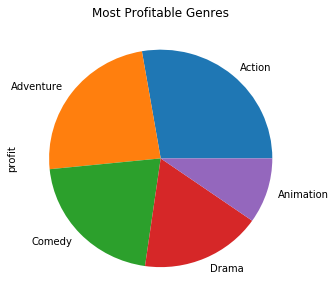

In [23]:
top5_genres.plot.pie(figsize=(5, 5));
plt.title("Most Profitable Genres");

Based on our data, action seem to be the most profitable genre with profits exceeding 57 billion dollars. In the 2nd place we find adventure movies with 13 less profits vs. action ones (49 billion dollars). Comedy, drama and animation movies follow with also high profits that reach 43, 36 and 20 billion dollars, respectively.

<a id="Q3"></a>
### What kinds of properties are associated with movies that have high revenues?

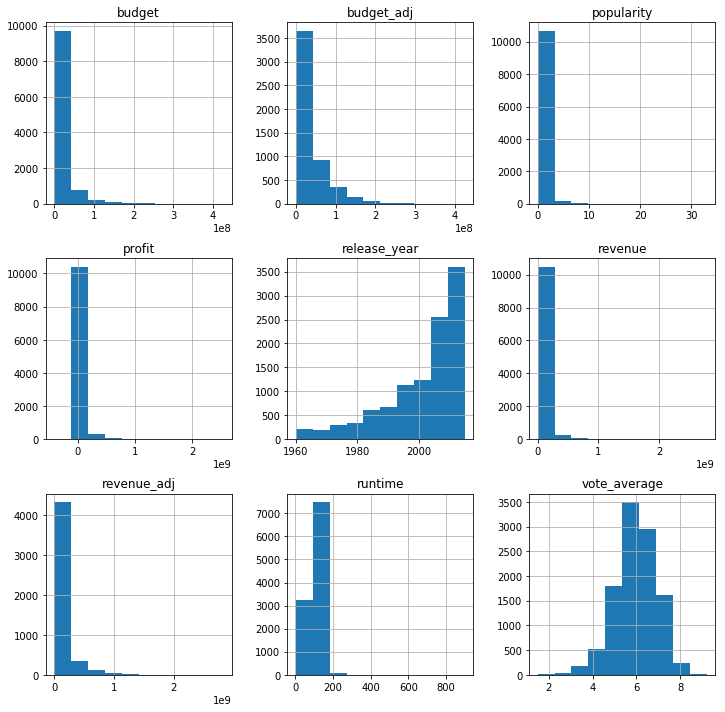

In [24]:
# We check what are the numerical data that are included in our dataset:
df.hist(figsize=(12,12));

We will compare the correlation between Revenue and:
- Budget spent
- Popularity
- Avg. Spend
- Runtime

#### Revenue Generated vs. Budget Spent
We will be checking the colleration between the revenue generated and the budget that was invested for each movie.

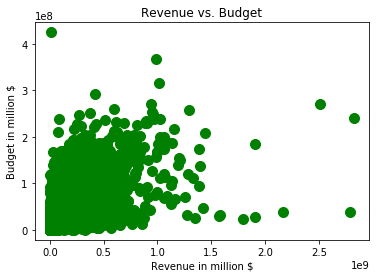

In [25]:
# We are creating a scatterplot in order to visualise the correlation between
# the revenue that was generated and the budget spent:
df_new.plot(x='revenue_adj', y='budget_adj', kind='scatter', s=100, title='Revenue vs. Budget', color = 'green')
plt.xlabel('Revenue in million $')
plt.ylabel('Budget in million $');

There is a positive correlation between budget and revenue, meaning that high or low revenue is associated with the respective revenue.

#### Revenue Generated vs. Popularity
We will be checking the colleration between the revenue generated and the popularity that each movie had

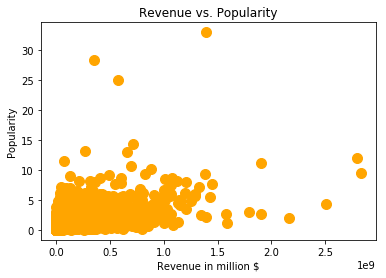

In [26]:
# We are creating a scatterplot in order to visualise the correlation between
# the revenue that was generated and the popularity that the movies had:
df_new.plot(x='revenue_adj', y='popularity', kind='scatter', s=100, title='Revenue vs. Popularity', color = 'orange');
plt.xlabel('Revenue in million $')
plt.ylabel('Popularity');

There is a positive correlation between popularity and revenue. Based on this we can say that movies with high popularity are associated with movies whose revenue is high, as well.

#### Revenue Generated vs. Avg. Vote
We will be checking the colleration between the revenue generated and the avg. vote each movie received.

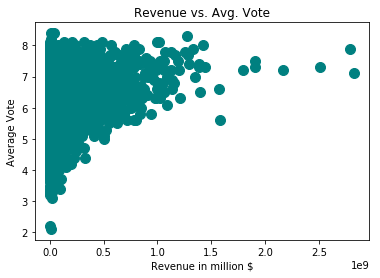

In [27]:
# We are creating a scatterplot in order to visualise the correlation between
# the revenue that was generated and the avg. vote received:
df_new.plot(x='revenue_adj', y='vote_average', kind='scatter', s=100, title='Revenue vs. Avg. Vote', color = 'teal')
plt.xlabel('Revenue in million $')
plt.ylabel('Average Vote');

Again, the correlation between revenue and avg. vote shows as positive. Movies that have high revenues seem to be getting a higher avg. vote and vice versa.

#### Does runtime affect revenue and how?
We will be checking the colleration between the revenue generated and the runtime of each movie.

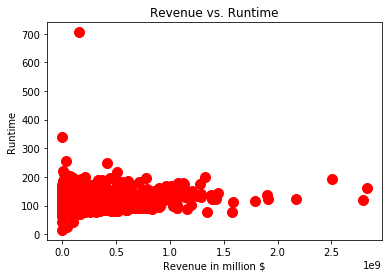

In [28]:
# We are creating a scatterplot in order to visualise the correlation between
# the revenue that was generated and each movie's runtime:
df_new.plot(x='revenue_adj', y='runtime', kind='scatter', s=100, title='Revenue vs. Runtime', color = 'red')
plt.xlabel('Revenue in million $')
plt.ylabel('Runtime');

We can see high revenue in regards to movies whose runtime is from 90 to 180 mins, with ~2-hour-long movies being the best performing.

#### Revenue per Director:
We will be checking the revenue generated from the movies of the top 5 of the directors with the most movies made.

In [29]:
# We are showing 6 lines instead of 5 as the 2nd in the list seems to be N/A.
df_new['director'].value_counts().head(6)

Woody Allen         45
N/A                 44
Clint Eastwood      34
Steven Spielberg    29
Martin Scorsese     29
Ridley Scott        23
Name: director, dtype: int64

In [45]:
# We define a function to calculate the average revenue generated by each director:
def mean_revenue(name):
    return df_new.query(("director == '{}'").format(name))['revenue_adj'].mean()

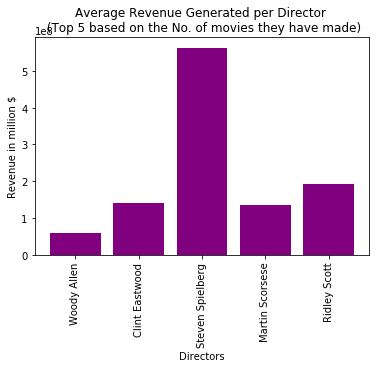

In [46]:
# Create a bar chart to show the above findings:
locations = [1, 2, 3, 4, 5]
heights = [mean_revenue("Woody Allen"),
          mean_revenue("Clint Eastwood"),
          mean_revenue("Steven Spielberg"),
          mean_revenue("Martin Scorsese"),
          mean_revenue("Ridley Scott")]
labels = ['Woody Allen', 'Clint Eastwood', 'Steven Spielberg', 'Martin Scorsese','Ridley Scott']
plt.bar(locations, heights, tick_label=labels, color = 'purple')
plt.title('Average Revenue Generated per Director \n (Top 5 based on the No. of movies they have made)')
plt.xlabel('Directors')
plt.xticks(locations, labels, rotation=90)
plt.ylabel('Revenue in million $');

Steven Spielberg seems to have generated the highest revenue (524 million dollars; an average of 18 million dollars per movie), although he has directed 16 movies less than Woody Allen and 5 less than Clint Eastwood. Martin Scorsese has an equal amount of movies as Spielberg, however the revenue from his movies is 84% less than Spielberg's. 

#### Revenue per Leading Actor:
We will be checking the revenue generated from the top 5 leading actors.

In [32]:
# We are showing 8 lines of data.
# The 1st one includes the N/A values, therefore we can't use it.
# The remaining ones show the top 5 leading actors. Please, note that
# in the 5th place we have 3 actors.
df_new['leading_actor'].value_counts().head(8)

N/A                   76
Nicolas Cage          50
Robert De Niro        42
Bruce Willis          39
Clint Eastwood        38
Tom Hanks             37
Sylvester Stallone    37
Johnny Depp           37
Name: leading_actor, dtype: int64

In [47]:
# We define a function to calculate the total revenue generated by each actor:
def total_revenue(name):
    return df_new.query(("leading_actor == '{}'").format(name))['revenue_adj'].sum()

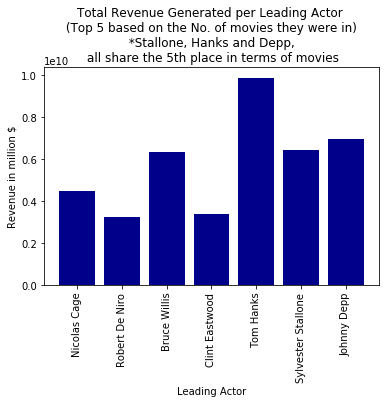

In [49]:
# Create a bar chart to show the above findings:
locations = [1, 2, 3, 4, 5, 6, 7]
heights = [total_revenue("Nicolas Cage"),
           total_revenue("Robert De Niro"),
           total_revenue("Bruce Willis"),
           total_revenue("Clint Eastwood"),
           total_revenue("Tom Hanks"),
           total_revenue("Sylvester Stallone"),
           total_revenue("Johnny Depp")]
labels = ['Nicolas Cage', 'Robert De Niro', 'Bruce Willis', 'Clint Eastwood', 'Tom Hanks', 'Sylvester Stallone', 'Johnny Depp']
plt.bar(locations, heights, tick_label=labels, color = 'darkblue')
plt.title('Total Revenue Generated per Leading Actor \n (Top 5 based on the No. of movies they were in) \n *Stallone, Hanks and Depp, \n all share the 5th place in terms of movies')
plt.xlabel('Leading Actor')
plt.xticks(locations, labels, rotation=90)
plt.ylabel('Revenue in million $');

Nicolas Cage is first on the list as he had the leading role in 50 movies, with a total revenue of 4.4 million dollars. Robert De Niro was the main actor in 42 movies, all which had a revenue of 3.2 million dollars. Bruce Willis and Clint Eastwood follow with 39 and 38 movies, respectively. On the 5th place we find 3 actors with 37 movies each; Johnny Depp, Sylvester Stallone and Tom Hanks. It is worth mentioning that although these 3 had less movies than the rest on the list, their movies have generated the most revenue of all.

<a id="Q4"></a>
### Which movie was the most profitable?

In [35]:
# We are checking all the details of the movie that had the highest profit:
df_new.iloc[df_new['profit'].idxmax()]

popularity                                                        9.43277
budget                                                          237000000
revenue                                                        2781505847
original_title                                                     Avatar
cast                    Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
director                                                    James Cameron
runtime                                                               162
genres                           Action|Adventure|Fantasy|Science Fiction
production_companies    Ingenious Film Partners|Twentieth Century Fox ...
release_date                                          2009-12-10 00:00:00
vote_average                                                          7.1
release_year                                                         2009
budget_adj                                                    2.40887e+08
revenue_adj                           

The movie with the highest profit was Avatar with a profit of $254,450,584.

<a id="Q5"></a>
### Which movie was the least profitable?

In [36]:
# We are checking all the details of the movie that had the lowest profit:
df_new.loc[df_new['profit'].idxmin()]

popularity                                                        0.25054
budget                                                          425000000
revenue                                                          11087569
original_title                                          The Warrior's Way
cast                    Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director                                                       Sngmoo Lee
runtime                                                               100
genres                          Adventure|Fantasy|Action|Western|Thriller
production_companies                             Boram Entertainment Inc.
release_date                                          2010-12-02 00:00:00
vote_average                                                          6.4
release_year                                                         2010
budget_adj                                                       4.25e+08
revenue_adj                           

The movie with the lowest profit was Warrior's Way with a negative profit of $413,912,431.

<a id='conclusions'></a>
## Conclusions
In order for us to make a profitable movie, we should consider the below: 
 - The budget should be 47 million dollars (avg. budget of all movies that didn't have a negative profit and budget and budget wasn't 0).
 - Runtime being around 113 minutes, from a revenue point of view and around 135 minutes, from a profit prespective.
 - Genre should either be Action, Adventure, Comedy, Drama or Animation.
 - Consider Nicolas Cage, Robert De Niro, Bruce Willis, Clint Eastwood, Sylvester Stallone, Tom Hanks or Johnny Depp (or any combination of the above) to star in it.
 - Hire Woody Allen, Clint Eastwood, Steven Spielberg, Martin Scorsese or Ridley Scott to direct it.

<a id='limitations'></a>
## Limitations
We managed to make a couple of assumptions using the data provided, however we should take into consideration a couple of limitations that might have affected the results (more or less):
 - Although we preferred replacing missing values with N/A instead of dropping the rows they were in, we should keep in mind that the
 - There were around 6k movies with zero budget and revenue. Some movies had revenue but no budget which showed them as really profitable and vice versa.
 - There were some zero-runtime movies, however they were only 31, so the impact from these missing values was really low.
 - 23 movies had no genre mentioned.
 - There were also movies that fell under several genres, however we only used the first one mentioned, using this as the main one.
 - 1,030 movies had no production companies mentioned.
 - We dropped the column with the number of votes each movie received and kept only the column with the avg. vote in order to be able to compare them. However, we need to mention that the number of votes each movie received varied.
 - The amounts for budget and revenue mentioned didn't not indicate the currency. We used U.S. dollars as the currency, however a lot of movies might have different currencies which were not specified.

In [50]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_TMDb_Movie_Dataset.ipynb'])

0